<h2> Finding the best Channel Model for an Optical Fiber Channel </h2>

<h3> Step 1 - Obtain fraction of the dataset and split it into train,test, and validation subsets </h3>
We obtain a fraction, because the original dataset size is huge and would take too long if we used all of it. 

https://medium.com/@spinjosovsky/normalize-data-before-or-after-split-of-training-and-testing-data-7b8005f81e26#:~:text=The%20recommended%20approach%20is%20to,results%20and%20unrealistic%20performance%20evaluations.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def obtain_datasets(fraction):
    # Helper function to load a fraction of the dataset
    def load_fraction(file_path, fraction):
        # Load the entire dataset
        full_data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["Time", "Amplitude"]).to_numpy()
        
        # Calculate the number of rows to load
        num_rows = int(len(full_data) * fraction)
        
        # Select the first `num_rows` rows (contiguous block)
        sampled_data = full_data[:num_rows]
        
        return sampled_data

    # Load sub-versions of each dataset
    pam_input_data = load_fraction("data/PAM-4 Input Data.txt", fraction)
    pam_output_data = load_fraction("data/PAM-4 Output Data.txt", fraction)

    qpsk_input_data = load_fraction("data/QPSK Input Data.txt", fraction)
    qpsk_output_data = load_fraction("data/QPSK Output Data.txt", fraction)

    qam_input_data = load_fraction("data/16-QAM Input Data.txt", fraction)
    qam_output_data = load_fraction("data/16-QAM Output Data.txt", fraction)

    # Helper function to split into train, validation, and test sets
    def obtain_train_validate_test(data):
        # Compute sizes
        train_size = int(0.7 * len(data))
        val_size = int(0.15 * len(data))
        test_size = len(data) - train_size - val_size

        # Perform splits
        train_data = data[:train_size]
        val_data = data[train_size:train_size + val_size]
        test_data = data[train_size + val_size:]

        return train_data, val_data, test_data

    # Split PAM datasets
    pam_train_input, pam_val_input, pam_test_input = obtain_train_validate_test(pam_input_data)
    pam_train_output, pam_val_output, pam_test_output = obtain_train_validate_test(pam_output_data)

    # Split QPSK datasets
    qpsk_train_input, qpsk_val_input, qpsk_test_input = obtain_train_validate_test(qpsk_input_data)
    qpsk_train_output, qpsk_val_output, qpsk_test_output = obtain_train_validate_test(qpsk_output_data)

    # Split QAM datasets
    qam_train_input, qam_val_input, qam_test_input = obtain_train_validate_test(qam_input_data)
    qam_train_output, qam_val_output, qam_test_output = obtain_train_validate_test(qam_output_data)

    # Organize everything into a dictionary for easy access
    datasets = {
        "PAM": {
            "train": (pam_train_input, pam_train_output),
            "validate": (pam_val_input, pam_val_output),
            "test": (pam_test_input, pam_test_output)
        },
        "QPSK": {
            "train": (qpsk_train_input, qpsk_train_output),
            "validate": (qpsk_val_input, qpsk_val_output),
            "test": (qpsk_test_input, qpsk_test_output)
        },
        "QAM": {
            "train": (qam_train_input, qam_train_output),
            "validate": (qam_val_input, qam_val_output),
            "test": (qam_test_input, qam_test_output)
        }
    }

    return datasets


In [10]:
window_size = 1024
# step_size = 1
# windows = create_windows(data, window_size, step_size)


# Function to obtain training, validation, and testing datasets
def obtain_datasets(fraction):
    # Helper function to load a fraction of the dataset
    def load_fraction(file_path, fraction):
        # Load the entire dataset
        full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
        
        # Calculate the number of rows to load
        num_rows = int(len(full_data) * fraction)
        
        # Select the first `num_rows` rows (contiguous block)
        sampled_data = full_data[:num_rows]
        
        return sampled_data

    # Load sub-versions of each dataset
    pam_input_data = load_fraction("data/PAM-4 Input Data.txt", fraction)
    pam_output_data = load_fraction("data/PAM-4 Output Data.txt", fraction)

    qpsk_input_data = load_fraction("data/QPSK Input Data.txt", fraction)
    qpsk_output_data = load_fraction("data/QPSK Output Data.txt", fraction)

    qam_input_data = load_fraction("data/16-QAM Input Data.txt", fraction)
    qam_output_data = load_fraction("data/16-QAM Output Data.txt", fraction)

    # Helper function to split into train, validation, and test sets
    def obtain_train_validate_test(data):
        # Compute sizes
        train_size = int(0.7 * len(data))
        val_size = int(0.15 * len(data))
        test_size = len(data) - train_size - val_size

        # Perform splits
        train_data = data[:train_size]
        val_data = data[train_size:train_size + val_size]
        test_data = data[train_size + val_size:]

        return train_data, val_data, test_data

    # Split PAM datasets
    pam_train_input, pam_val_input, pam_test_input = obtain_train_validate_test(pam_input_data)
    pam_train_output, pam_val_output, pam_test_output = obtain_train_validate_test(pam_output_data)

    # Split QPSK datasets
    qpsk_train_input, qpsk_val_input, qpsk_test_input = obtain_train_validate_test(qpsk_input_data)
    qpsk_train_output, qpsk_val_output, qpsk_test_output = obtain_train_validate_test(qpsk_output_data)

    # Split QAM datasets
    qam_train_input, qam_val_input, qam_test_input = obtain_train_validate_test(qam_input_data)
    qam_train_output, qam_val_output, qam_test_output = obtain_train_validate_test(qam_output_data)

    # Organize everything into a dictionary for easy access
    datasets = {
        "PAM": {
            "train": (pam_train_input, pam_train_output),
            "validate": (pam_val_input, pam_val_output),
            "test": (pam_test_input, pam_test_output)
        },
        "QPSK": {
            "train": (qpsk_train_input, qpsk_train_output),
            "validate": (qpsk_val_input, qpsk_val_output),
            "test": (qpsk_test_input, qpsk_test_output)
        },
        "QAM": {
            "train": (qam_train_input, qam_train_output),
            "validate": (qam_val_input, qam_val_output),
            "test": (qam_test_input, qam_test_output)
        }
    }

    return datasets


Testing this function

C:\Users\tomha\AppData\Local\Temp\ipykernel_12204\3216833276.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
C:\Users\tomha\AppData\Local\Temp\ipykernel_12204\3216833276.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
C:\Users\tomha\AppData\Local\Temp\ipykernel_12204\3216833276.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
C:\Users\tomha\AppData\Local\Te

PAM Training Input Shape: (36699, 2)
PAM Training Output Shape: (36699, 2)


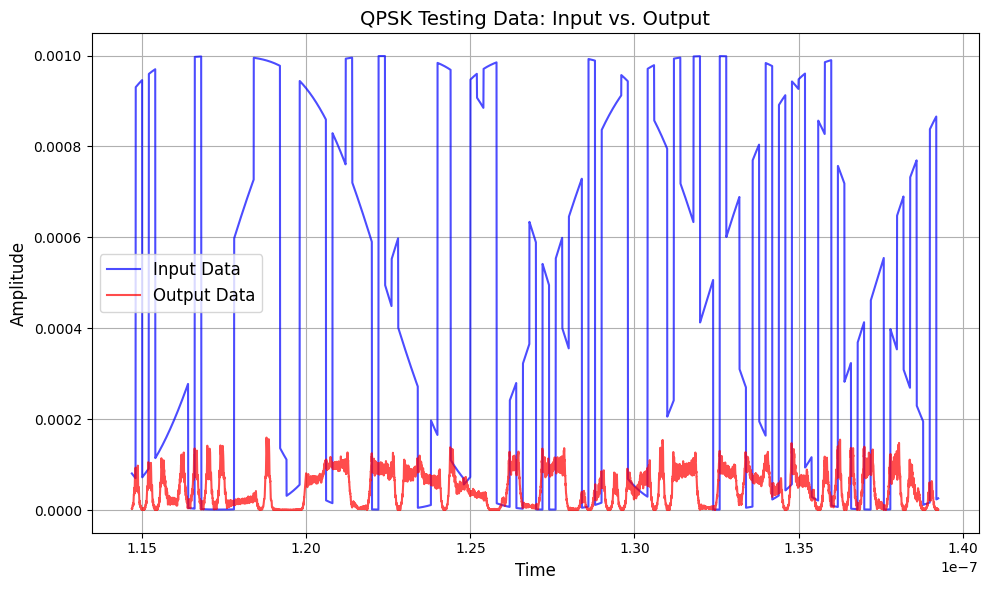

In [11]:
import matplotlib.pyplot as plt


# Specify the fraction of data to use (e.g., 0.1 for 10%)
fraction = 0.05

# Get the datasets
datasets = obtain_datasets(fraction)

# Access the PAM training dataset
pam_train_input, pam_train_output = datasets["PAM"]["train"]

# Access the QPSK validation dataset
qpsk_val_input, qpsk_val_output = datasets["QPSK"]["validate"]

# Access the QAM test dataset
qam_test_input, qam_test_output = datasets["QAM"]["test"]

print("PAM Training Input Shape:", pam_train_input.shape)
print("PAM Training Output Shape:", pam_train_output.shape)



# Plot the PAM training data
plt.figure(figsize=(10, 6))

# Input data plot
plt.plot(qpsk_val_input[:, 0], qpsk_val_input[:, 1], label="Input Data", color="blue", alpha=0.7)

# Output data plot
plt.plot(qpsk_val_output[:, 0], qpsk_val_output[:, 1], label="Output Data", color="red", alpha=0.7)

# Add labels and legend
plt.title("QPSK Testing Data: Input vs. Output", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\tomha\AppData\Local\Temp\ipykernel_12204\3216833276.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
C:\Users\tomha\AppData\Local\Temp\ipykernel_12204\3216833276.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
C:\Users\tomha\AppData\Local\Temp\ipykernel_12204\3216833276.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
C:\Users\tomha\AppData\Local\Te

PAM Training Input Shape: (36699, 2)
PAM Training Output Shape: (36699, 2)


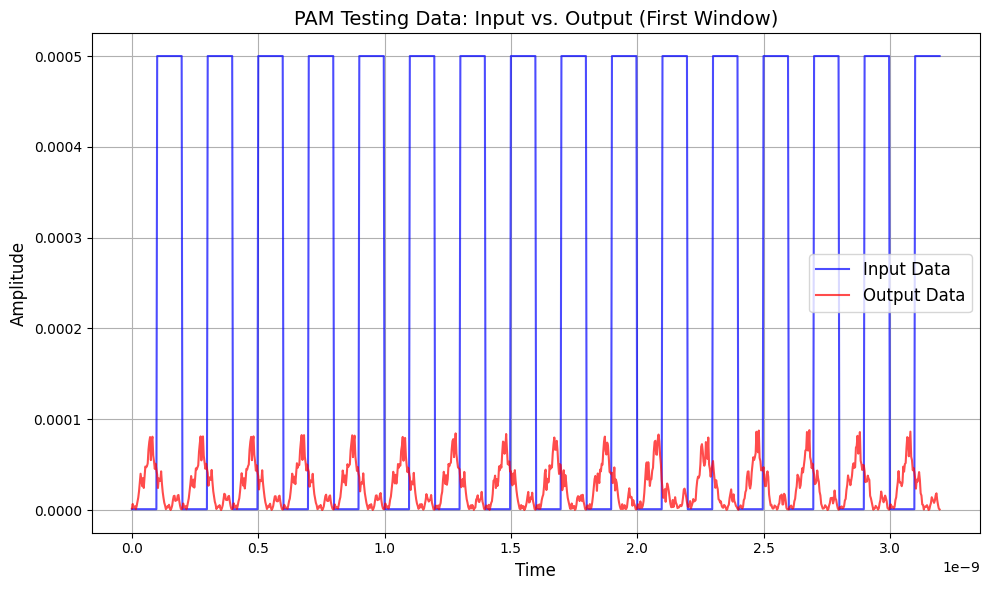

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create sliding windows from the data
def create_windows(data, window_size, step_size):
    """
    Create sliding windows from the dataset.
    :param data: The input data array (should be 2D: samples x features)
    :param window_size: The size of each sliding window
    :param step_size: The step size between consecutive windows
    :return: A 3D array where each window is a sub-array of shape (window_size, features)
    """
    windows = []
    for i in range(0, len(data) - window_size + 1, step_size):
        windows.append(data[i:i+window_size])
    return np.array(windows)

# Specify the fraction of data to use (e.g., 0.1 for 10%)
fraction = 0.05

# Get the datasets
datasets = obtain_datasets(fraction)

# Access the PAM training dataset
pam_train_input, pam_train_output = datasets["PAM"]["train"]

# Access the QPSK validation dataset
qpsk_val_input, qpsk_val_output = datasets["QPSK"]["validate"]

# Access the QAM test dataset
qam_test_input, qam_test_output = datasets["QAM"]["test"]

print("PAM Training Input Shape:", pam_train_input.shape)
print("PAM Training Output Shape:", pam_train_output.shape)

# Define window size and step size
window_size = 1024
step_size = 1

# Create windows for PAM training data
pam_train_input_windows = create_windows(pam_train_input, window_size, step_size)
pam_train_output_windows = create_windows(pam_train_output, window_size, step_size)

# Create windows for QPSK validation data
qpsk_val_input_windows = create_windows(qpsk_val_input, window_size, step_size)
qpsk_val_output_windows = create_windows(qpsk_val_output, window_size, step_size)

# Create windows for QAM test data
qam_test_input_windows = create_windows(qam_test_input, window_size, step_size)
qam_test_output_windows = create_windows(qam_test_output, window_size, step_size)

# Plot the QPSK validation data (example for the first window)
plt.figure(figsize=(10, 6))

# Input data plot (first window in QPSK validation data)
plt.plot(pam_train_input_windows[0, :, 0], pam_train_input_windows[0, :, 1], label="Input Data", color="blue", alpha=0.7)

# Output data plot (first window in QPSK validation data)
plt.plot(pam_train_output_windows[0, :, 0], pam_train_output_windows[0, :, 1], label="Output Data", color="red", alpha=0.7)

# Add labels and legend
plt.title("PAM Testing Data: Input vs. Output (First Window)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


<h3>Step 2 - Data Processing </h3>

There are 2 main data preprocessing techniques:
1. Normalization
2. Standardization

"By becoming familiar with normalization and standardization, you will boost the performance of your models, better interpret the results, and avoid <b> common pitfalls </b> that come with unscaled data"

Normalization and standardization both belong to the idea or category of feature scaling. Which involves transforming the the values of the features in a dataset to a similar scale, ensuring that all features contribute equally to the model's learning progress. Feature scaling is important because, when features are on vastly different scales, like a feature ranging from 1 to 10 and another from 1,000 to 10,000, models can prioritize the larger values, leading to bias in predictions.

<li> Normalization : Rescaling the data to a fixed range, typically [0, 1].

<li> standardization specifically refers to adjusting the data so that it has a mean of 0 and a standard deviation of 1.
</br>

Key consideration for this application is that our feature values are already <b> really small</b>. 

In [15]:
def normalize_amplitude_values(data_amplitude_col):
    data_mean, data_std = data_amplitude_col.mean(), data_amplitude_col.std()
    data_amplitude_col_normalized = (data_amplitude_col - data_mean) / data_std
    return data_amplitude_col_normalized


<h3>Step 3 - Necessary Helper Functions </h3>

In [20]:
# Sliding window function
def create_windows(data, window_size, step_size):
    num_windows = (len(data) - window_size) // step_size + 1
    windows = np.array([
        data[i:i + window_size]  # Extract rows for each window
        for i in range(0, num_windows * step_size, step_size)
    ])
    return windows


<h3>Step 4 - NN Models </h3>

In [17]:
window_size = 1024
step_size = 1
windows = create_windows(data, window_size, step_size)



NameError: name 'create_windows' is not defined

In [ ]:
# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100, patience=15):
    train_losses = []
    val_losses = []
    best_weights = None

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

        # Early stopping
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_weights = {"model weights": model.state_dict()}
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    return train_losses, val_losses, best_weights

In [22]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

# Define the basic FNN model
class FiberOpticFNN0(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout):
        super(FiberOpticFNN0, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),  # Batch normalization
            nn.ReLU(),
            nn.Dropout(dropout),  # Dropout for regularization
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),  # Batch normalization
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, output_dim)
        )

    def forward(self, x):
        return self.fc(x)
    

# Define the deeper model
class FiberOpticFNN1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout):
        super(FiberOpticFNN1, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Define the wider model
class FiberOpticFNN2(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout):
        super(FiberOpticFNN2, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim * 2),
            nn.BatchNorm1d(hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, output_dim)
        )
    def forward(self, x):
        return self.fc(x)

# Define the dynamic model
class FiberOpticFNN3(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout):
        super(FiberOpticFNN3, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, int(hidden_dim * 0.75)),
            nn.BatchNorm1d(int(hidden_dim * 0.75)),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(int(hidden_dim * 0.75), int(hidden_dim * 0.5)),
            nn.BatchNorm1d(int(hidden_dim * 0.5)),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(int(hidden_dim * 0.5), output_dim)
        )
    def forward(self, x):
        return self.fc(x)

# Define the noise-resilient model
class FibreOpticFNN4(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout):
        super(FibreOpticFNN4, self).__init__()

        # Initial feature extraction
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU()
        )

        # Noise-focused branch (captures small deviations)
        self.noise_branch = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.Tanh(),
            nn.Dropout(dropout)
        )

        # Residual connection for refined outputs
        self.residual = nn.Linear(hidden_dim, hidden_dim)

        # Final layer combining noise and refined features
        self.combined = nn.Sequential(
            nn.Linear(hidden_dim + hidden_dim // 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        # Extract features
        features = self.feature_extractor(x)

        # Process noise-sensitive features
        noise_features = self.noise_branch(features)

        # Add residual connection
        refined_features = features + self.residual(features)

        # Combine noise-sensitive and refined features
        combined_input = torch.cat((refined_features, noise_features), dim=1)

        # Final output
        output = self.combined(combined_input)
        return output

# Define the Residual Connections model
class FibreOpticFNN5(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FibreOpticFNN5, self).__init__()
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
        )
        self.hidden_layer = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
        )
        self.output_layer = nn.Sequential(
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        x = self.input_layer(x)
        x = x + self.hidden_layer(x)  # Residual connection
        return self.output_layer(x)


In [ ]:
def objective0(trial):

    best_val_loss = float("inf")

    # Hyperparameters to tune
    hidden_dim = trial.suggest_int("hidden dim", 128, 320, step= 16)
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log = True)
    weight_decay = trial.suggest_float("weight decay", 1e-6, 1e-3, log =True)
    dropout_rate = trial.suggest_float("dropout rate", 0.1, 0.5)

    #instatiate the model
    model = FiberOpticFNN0(X_train.shape[1], hidden_dim, 1, dropout_rate)
    model = model.float()

    criterion = nn.MSELoss() #define loss function
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay) #define optimizer

    # Train the model
    train_losses, val_losses, best_weights = train_model(
        model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        num_epochs=100,
        patience=15
    )

    if min(val_losses) < best_val_loss:
        best_val_loss = min(val_losses)
        best_params = {"model weights": best_weights,
                       "hidden_dim": hidden_dim,
                       "lr": lr,
                       "weight_decay": weight_decay,
                       "dropout_rate": dropout_rate,
                       "train_losses": train_losses,
                       "val_losses": val_losses
                       }
        torch.save(best_params, ".venv/basic/best_params.pth")

    return best_val_loss
